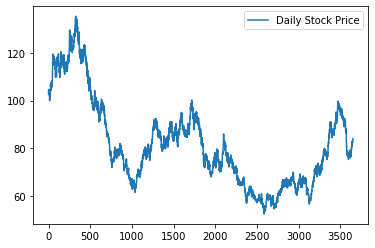

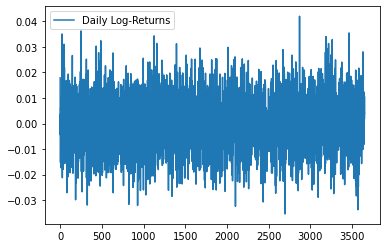

Annualized estimated mean log-return is -0.019870450193600574
Annualized estimated log-return std deviation is 0.20023933146718348


In [1]:
### problem 1

#(a)
import numpy as np

#(b)
import matplotlib.pyplot as plt

#(c)
#solve sde function first, then write its answer
mu = 0.06
sigma = 0.2
n = 365*10
dt = 10/(365.0*10)
dz = np.random.randn(n)*np.sqrt(dt)
S = []
S0 = 100
S = S0*np.exp(np.cumsum( mu*dt-0.5*sigma*sigma*dt+sigma*dz ))

#(d)
plt.plot(S, label='Daily Stock Price')
plt.legend()
plt.show()

#(e) 
logret = np.log(S[1:n]/S[0:n-1])

#(f)
plt.plot(logret, label='Daily Log-Returns')
plt.legend()
plt.show()

#(g) 
print('Annualized estimated mean log-return is', np.mean(logret)/dt)
print('Annualized estimated log-return std deviation is', np.std(logret)/np.sqrt(dt))

How many observations has your sample? 25933


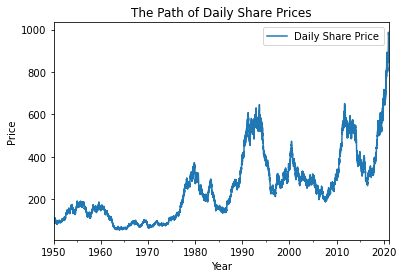

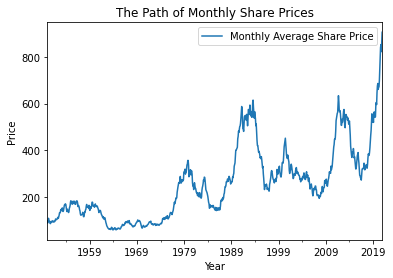

In [2]:
# problem 2

#(a)
import pandas as pd

#(b)
# reuse the function in problem 1
prng=pd.period_range('1950-01-01','2020-12-31',freq='D')

mu = 0.06
sigma = 0.20
n = len(prng)
dt = 10/(365.0*10)
dz = np.random.randn(n)*np.sqrt(dt)
S0 = 100
S = pd.Series(S0*np.exp(np.cumsum( mu*dt-0.5*sigma*sigma*dt+sigma*dz )),prng)
#(c)
# 1.How many observations has your sample? 
n1=len(S)
print('How many observations has your sample?', n1)

# 2. Plot the path of daily share prices
S.plot(label='Daily Share Price')
plt.title('The Path of Daily Share Prices')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()

#(d) 
# by the hint, Use s.resample(rule) function
S_month = S.resample('M').mean()

#(e)
S_month.plot(label='Monthly Average Share Price')
plt.title('The Path of Monthly Share Prices')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()


In [76]:
logret_day

0       -0.0009551556
1       -0.0037366334
2        0.0031861012
3       -0.0027453306
4       -0.0172277960
             ...     
25927    0.0302359509
25928    0.0128882518
25929    0.0128636917
25930    0.0052955419
25931   -0.0097663622
Length: 25932, dtype: float64

In [80]:
np.shape(S_week_prices)

(3706,)

In [113]:
# problem 3

#(a) log returns
logret_day = np.log(S.values[1:n]/S.values[0:n-1])
logret_day = pd.Series(logret_day)


S_week_prices = S.resample('W', convention = 'start').first()
logret_week = np.log(S_week_prices.values[1:len(S_week_prices)]/S_week_prices.values[0:len(S_week_prices)-1])
logret_week = pd.Series(logret_week)

S_month_prices = S.resample('M', convention = 'start').first()
logret_month = np.log(S_month_prices.values[1:len(S_month_prices)]/S_month_prices.values[0:len(S_month_prices)-1])
logret_month = pd.Series(logret_month)

In [114]:
#(b) Summary statistics
#daily summary statistics
logret_day.describe()

count   25,932.0000000000
mean         0.0000877118
std          0.0103708446
min         -0.0402785293
25%         -0.0068649548
50%          0.0001758052
75%          0.0070731440
max          0.0399865752
dtype: float64

In [115]:
#Weekly summary statistics
logret_week.describe()

count   3,705.0000000000
mean        0.0006116462
std         0.0278588989
min        -0.1019202862
25%        -0.0182635806
50%         0.0004569780
75%         0.0194037345
max         0.1000268156
dtype: float64

In [116]:
#Monthly summary statistics
logret_month.describe()

count   851.0000000000
mean      0.0025514709
std       0.0579635027
min      -0.1595414129
25%      -0.0366839528
50%       0.0019728639
75%       0.0428776952
max       0.1885181884
dtype: float64

In [117]:
#(c) Annualized mean and standard deviation of log-returns
print(f"The annualized mean for daily log-returns is {np.mean(logret_day)*365} and the the annualized std is {np.std(logret_day)*np.sqrt(365)}")
print(f"The annualized mean for weekly log-returns is {np.mean(logret_week)*52} and the the annualized std is {np.std(logret_week)*np.sqrt(52)}")
print(f"The annualized mean for monthly log-returns is {np.mean(logret_month)*12} and the the annualized std is {np.std(logret_month)*np.sqrt(12)}")


The annualized mean for daily log-returns is 0.032014800627570734 and the the annualized std is 0.19813088844843355
The annualized mean for weekly log-returns is 0.0318056010304898 and the the annualized std is 0.20086626383392928
The annualized mean for monthly log-returns is 0.030617651126071593 and the the annualized std is 0.20067345483387167


<AxesSubplot:title={'center':'Daily returns'}>

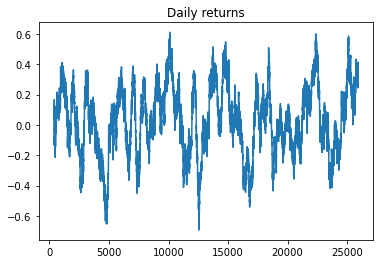

In [118]:
#(d) Visualize annualized mean and standard deviation of log-returns
(logret_day.rolling(window=365).mean()*365).plot(title="Daily returns")

<AxesSubplot:title={'center':'Weekly returns'}>

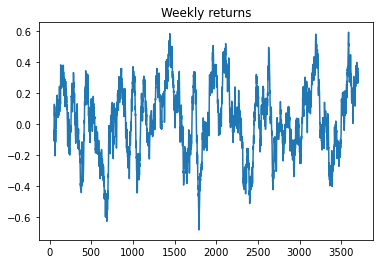

In [119]:
(logret_week.rolling(window=52).mean()*52).plot(title="Weekly returns")

<AxesSubplot:title={'center':'Monthly returns'}>

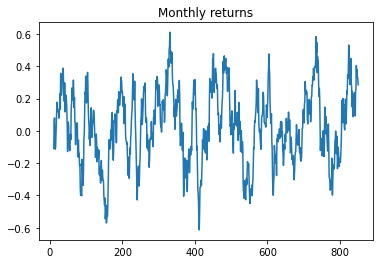

In [120]:
(logret_month.rolling(window=12).mean()*12).plot(title="Monthly returns")

<AxesSubplot:title={'center':'Daily returns'}>

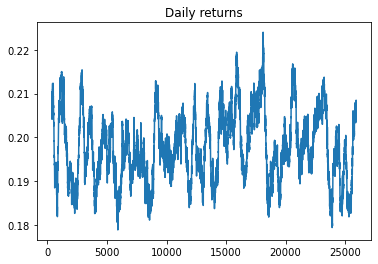

In [125]:
(logret_day.rolling(window=365).std()*np.sqrt(365)).plot(title="Daily returns")

<AxesSubplot:title={'center':'Weekly returns'}>

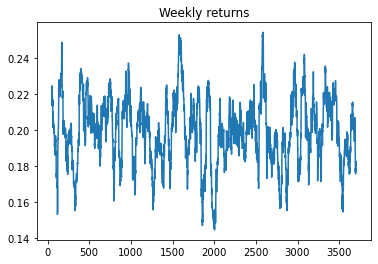

In [126]:
(logret_week.rolling(window=52).std()*np.sqrt(52)).plot(title="Weekly returns")

<AxesSubplot:title={'center':'Monthly returns'}>

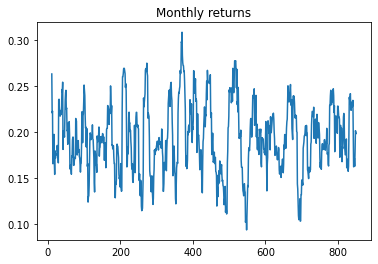

In [127]:
(logret_month.rolling(window=12).std()*np.sqrt(12)).plot(title="Monthly returns")

### (e) How does the historical variation in the annualized mean and standard deviation estimates compare across sampling frequencies?




The mean estimate does not vary accross frequencies, but its value is very noisy as is fluctuates a lot.

For the std we observe that when the timespan is shorter we obtain a more accurate estimator when we increase time we observe more noise for the estimate

In [ ]:
#(f) Put data into bins